# Import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


## Import Functions

### dslabs_functions

In [3]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [4]:
%run "scripts/data_functions.py"


dslabs_functions lodaded
data_functions lodaded


# Load

In [5]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_data_prep_outliers.csv'


file_tag = 'Citi Bike'

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

In [6]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

#id_cols=['ride_id','start_time', 'end_time','start_station','end_station','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','wmo_weather_code','snowfall_cm','ride_duration_sec']
##remove also col = 'snowfall_cm' because it has only 0 values in our dataset
##remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow
#
#df=df.drop(columns=id_cols, axis=1)

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045355 entries, 0 to 3045354
Data columns (total 39 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   bike_type                           int64  
 1   user_type                           int64  
 2   day_of_month                        int64  
 3   is_weekend                          int64  
 4   ride_duration_min                   float64
 5   temperature_2m                      float64
 6   rain_mm                             float64
 7   cloud_cover_low_pct                 int64  
 8   wind_speed_10m                      float64
 9   ride_distance_km                    float64
 10  ride_avg_speed                      float64
 11  time_of_day_sin                     float64
 12  time_of_day_cos                     float64
 13  day_of_week_sin                     float64
 14  day_of_week_cos                     float64
 15  hour_sin                            float64
 16  

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
0,1,1,27,1,9.161483,14.3,0.0,16,25.3,2.037884,...,0,0,0,0,0,0,1,0,0,0
1,1,1,25,0,4.639433,11.2,0.0,0,13.7,1.447460,...,0,1,0,0,0,0,0,0,0,0
2,1,1,6,1,6.865817,9.6,0.0,95,27.9,1.785276,...,0,0,0,0,0,0,1,0,0,0
3,1,1,6,1,2.289150,10.7,0.0,11,25.4,0.431973,...,0,0,0,0,0,0,1,0,0,0
4,1,1,10,0,7.947850,15.0,0.0,44,10.7,1.376807,...,0,0,0,0,0,0,0,1,0,0
5,1,1,7,1,27.290533,13.4,0.0,0,22.3,2.404062,...,0,0,0,0,0,0,1,0,0,0
6,1,1,25,0,10.656417,7.9,0.0,0,15.4,2.072039,...,0,1,0,0,0,0,0,0,0,0
7,1,1,14,1,23.607000,20.8,0.0,0,21.3,4.927812,...,0,0,0,0,0,0,1,0,0,0
8,1,1,17,0,10.698533,15.4,0.0,79,18.2,2.572462,...,0,0,0,0,0,0,1,0,0,0
9,1,1,26,0,7.501383,10.4,0.0,0,4.4,1.758236,...,0,1,0,0,0,0,0,0,0,0


In [8]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
bike_type                                   2
user_type                                   2
day_of_month                               31
is_weekend                                  2
ride_duration_min                     1331444
temperature_2m                            211
rain_mm                                    12
cloud_cover_low_pct                        72
wind_speed_10m                            246
ride_distance_km                      2077656
ride_avg_speed                        3013417
time_of_day_sin                             6
time_of_day_cos                             5
day_of_week_sin                             7
day_of_week_cos                             7
hour_sin                                   13
hour_cos                                   13
start_borough_Bronx                         2
start_borough_Brooklyn                      2
start_borough_Jersey City 

In [9]:
display(df.head(10))

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
0,1,1,27,1,9.161483,14.3,0.0,16,25.3,2.037884,...,0,0,0,0,0,0,1,0,0,0
1,1,1,25,0,4.639433,11.2,0.0,0,13.7,1.447460,...,0,1,0,0,0,0,0,0,0,0
2,1,1,6,1,6.865817,9.6,0.0,95,27.9,1.785276,...,0,0,0,0,0,0,1,0,0,0
3,1,1,6,1,2.289150,10.7,0.0,11,25.4,0.431973,...,0,0,0,0,0,0,1,0,0,0
4,1,1,10,0,7.947850,15.0,0.0,44,10.7,1.376807,...,0,0,0,0,0,0,0,1,0,0
5,1,1,7,1,27.290533,13.4,0.0,0,22.3,2.404062,...,0,0,0,0,0,0,1,0,0,0
6,1,1,25,0,10.656417,7.9,0.0,0,15.4,2.072039,...,0,1,0,0,0,0,0,0,0,0
7,1,1,14,1,23.607000,20.8,0.0,0,21.3,4.927812,...,0,0,0,0,0,0,1,0,0,0
8,1,1,17,0,10.698533,15.4,0.0,79,18.2,2.572462,...,0,0,0,0,0,0,1,0,0,0
9,1,1,26,0,7.501383,10.4,0.0,0,4.4,1.758236,...,0,1,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
count,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,...,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3.045355e+06,3045355.0,3045355.0
mean,6.496553e-01,8.179257e-01,1.668017e+01,2.748803e-01,1.165372e+01,1.304111e+01,3.787542e-02,1.942223e+01,1.529853e+01,1.869688e+00,...,3.352647e-04,2.782493e-01,2.210908e-03,7.906730e-02,3.110836e-02,9.629124e-02,4.368348e-01,7.623807e-02,0.0,0.0
std,4.770779e-01,3.859058e-01,8.184047e+00,4.464540e-01,9.707604e+00,5.210624e+00,1.368637e-01,3.447164e+01,7.103601e+00,1.431440e+00,...,1.830717e-02,4.481369e-01,4.696829e-02,2.698438e-01,1.736106e-01,2.949903e-01,4.959942e-01,2.653787e-01,0.0,0.0
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.001633e+00,6.000000e-01,0.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,5.102667e+00,9.100000e+00,0.000000e+00,0.000000e+00,9.800000e+00,8.327350e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,1.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00,8.783183e+00,1.240000e+01,0.000000e+00,0.000000e+00,1.490000e+01,1.461403e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
75%,1.000000e+00,1.000000e+00,2.400000e+01,1.000000e+00,1.505938e+01,1.700000e+01,0.000000e+00,1.700000e+01,2.010000e+01,2.519296e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,0.0
max,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,7.517978e+01,2.810000e+01,1.100000e+00,1.000000e+02,3.640000e+01,7.261306e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0


# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [11]:

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

def apply_standard_scaler(df: DataFrame) -> DataFrame:

    df_copy = df.copy()
    
    # Apply scaling to all the feature columns (since there is no target)
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_zscore

In [12]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy)

    return df_zscore

df_1=apply_strategy_1(df)

df_1.columns

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm

In [13]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045355 entries, 0 to 3045354
Data columns (total 39 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   bike_type                           float64
 1   user_type                           float64
 2   day_of_month                        float64
 3   is_weekend                          float64
 4   ride_duration_min                   float64
 5   temperature_2m                      float64
 6   rain_mm                             float64
 7   cloud_cover_low_pct                 float64
 8   wind_speed_10m                      float64
 9   ride_distance_km                    float64
 10  ride_avg_speed                      float64
 11  time_of_day_sin                     float64
 12  time_of_day_cos                     float64
 13  day_of_week_sin                     float64
 14  day_of_week_cos                     float64
 15  hour_sin                            float64
 16  

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [14]:
from sklearn.preprocessing import MinMaxScaler

def apply_min_max_scaler(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
        # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    return df_minmax

In [15]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm

# scaling plot - visualize oth streategies

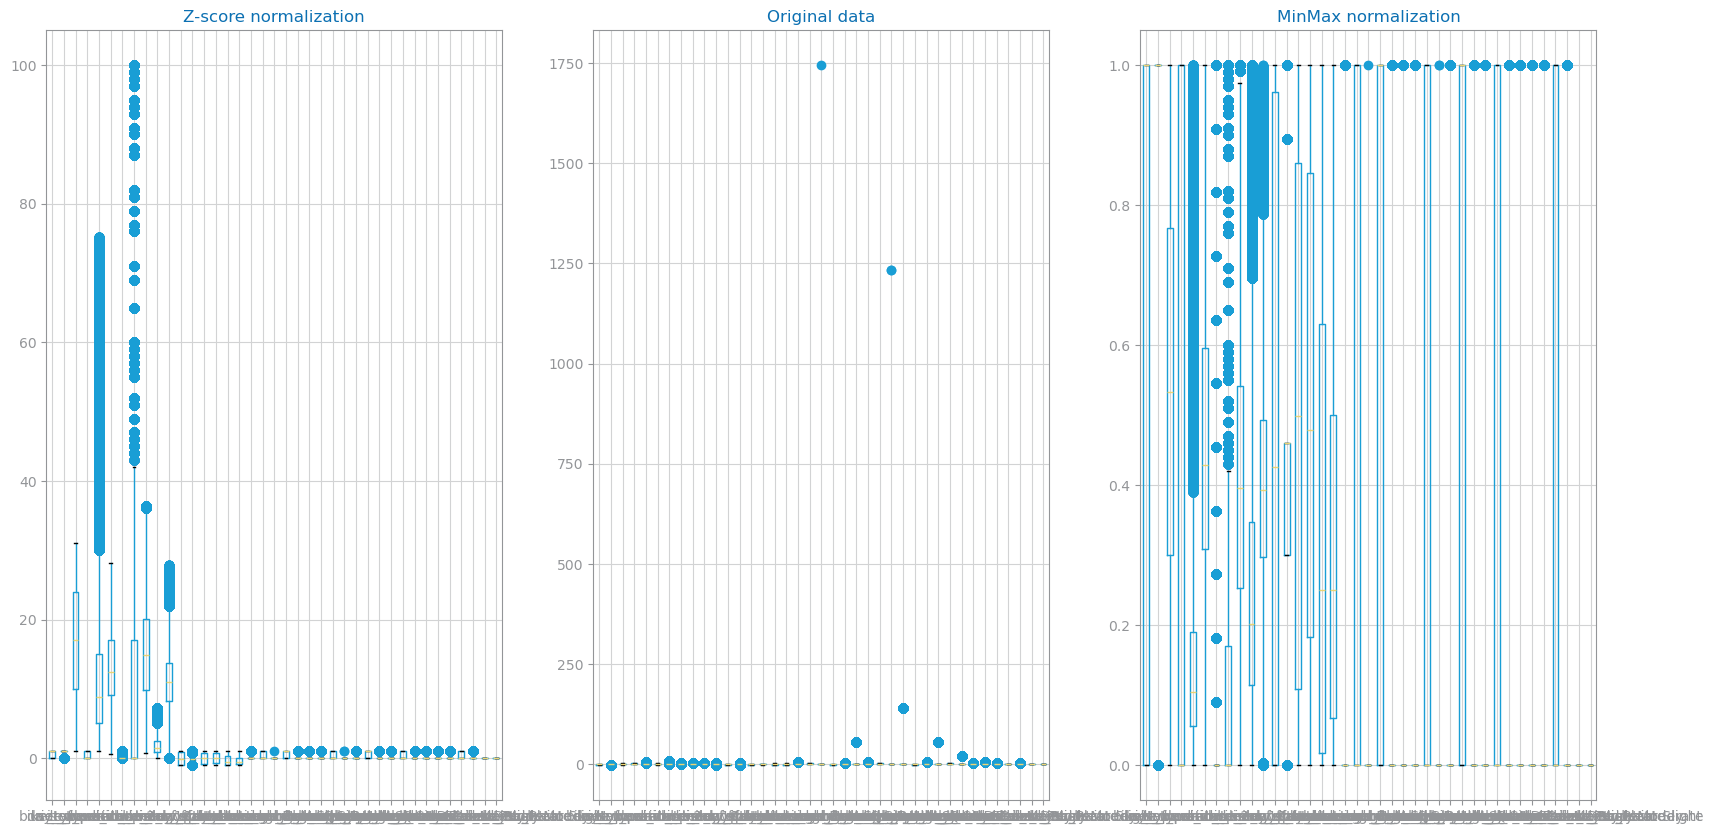

In [16]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
df.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_1.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_2.boxplot(ax=axs[0, 2])
show()

# Analysis

Comparing Scalling approaches:
- In Scalling treatment, let's go with approach 1 as it's more suitable to clustering techniques (also assuming that our numeric variables have normalized distribuition)

# save to csv

In [17]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/citi_bike_data_prep_scaling_no_outliers.csv", index=False)
    

    print(data_save.columns)

Index(['bike_type', 'user_type', 'day_of_month', 'is_weekend',
       'ride_duration_min', 'temperature_2m', 'rain_mm', 'cloud_cover_low_pct',
       'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'start_borough_Bronx',
       'start_borough_Brooklyn', 'start_borough_Jersey City',
       'start_borough_Manhattan', 'start_borough_Queens',
       'start_borough_Staten Island', 'end_borough_Bronx',
       'end_borough_Brooklyn', 'end_borough_Hoboken',
       'end_borough_Jersey City', 'end_borough_Manhattan',
       'end_borough_Queens', 'end_borough_Staten Island',
       'wmo_weather_desc_Clear sky', 'wmo_weather_desc_Drizzle: Dense',
       'wmo_weather_desc_Drizzle: Light', 'wmo_weather_desc_Drizzle: Moderate',
       'wmo_weather_desc_Mainly clear', 'wmo_weather_desc_Overcast',
       'wmo_weather_desc_Partly cloudy', 'wmo_weather_desc_Rain: Moderate',
       'wm